# Sales Prediction using Python
Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.
Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let's start the task of sales prediction with machine learning using Python.

# Data:
Dataset is taken from Kaggle: https://www.kaggle.com/datasets/bumba5341/advertisingcsv

In [1]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor  

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Data Exploration

In [2]:
df=pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df = df.rename(columns={df.columns[0]: 'Index'})
df.head()

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df=df.drop(columns=["Index"])
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [6]:
df.shape

(200, 4)

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
# DataFrame of column name with number of null values present
total = df.isnull().sum().sort_values()
percent = total / df.isnull().count().sort_values()
pd.concat([total,percent],axis = 1,keys = ['Count','%'])

,Count,%
TV,0,0.0
Radio,0,0.0
Newspaper,0,0.0
Sales,0,0.0


We can see there is no null value in our dataset.

In [9]:
df.duplicated().sum()

0

In [10]:
total_sales = {
    'TV': df['TV'].sum(),
    'Radio': df['Radio'].sum(),
    'Newspaper': df['Newspaper'].sum()
}

In [11]:
labels = list(total_sales.keys())
sales = list(total_sales.values())

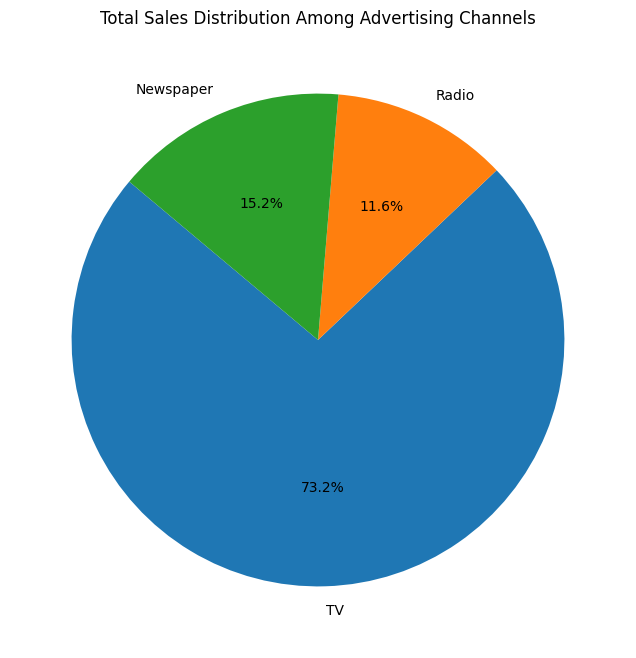

In [12]:
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales, labels=labels, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Total Sales Distribution Among Advertising Channels')

# Show the plot
plt.show()

We can see there is no duplicated value in our dataset.

# Data Representation

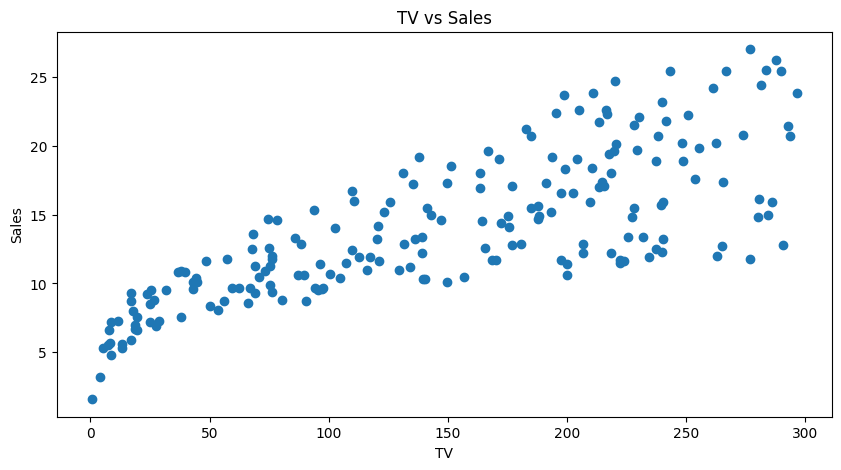

In [13]:
plt.figure(figsize=(10,5))
plt.plot(df.TV,df.Sales,marker="o",linestyle="none");
plt.title("TV vs Sales");
plt.xlabel("TV");
plt.ylabel("Sales");

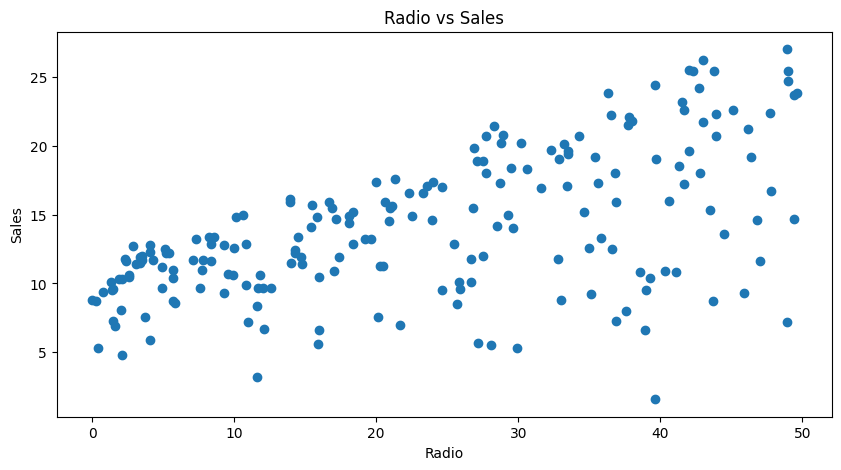

In [14]:
plt.figure(figsize=(10,5))
plt.plot(df.Radio,df.Sales,marker="o",linestyle="none");
plt.title("Radio vs Sales");
plt.xlabel("Radio");
plt.ylabel("Sales");

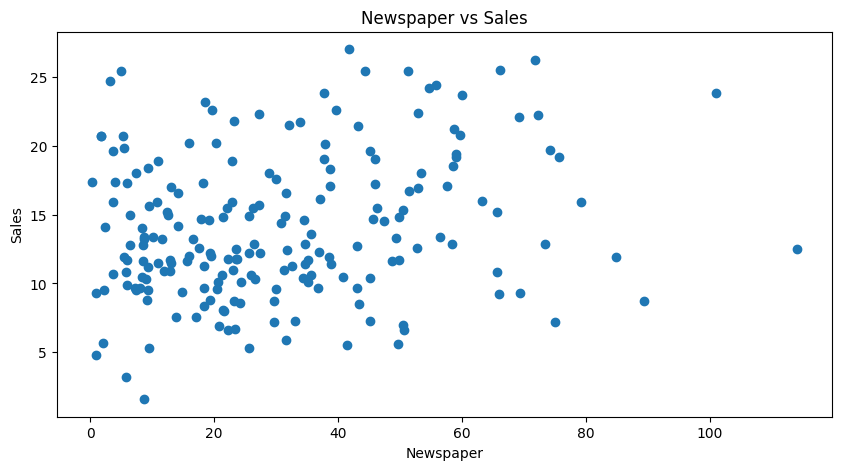

In [15]:
plt.figure(figsize=(10,5))
plt.plot(df.Newspaper,df.Sales,marker="o",linestyle="none");
plt.title("Newspaper vs Sales");
plt.xlabel("Newspaper");
plt.ylabel("Sales");

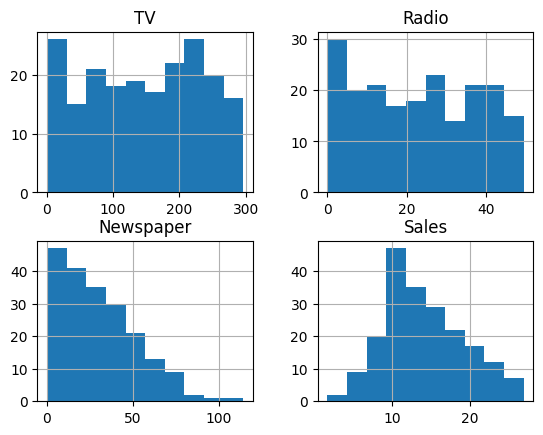

In [16]:
df.hist();

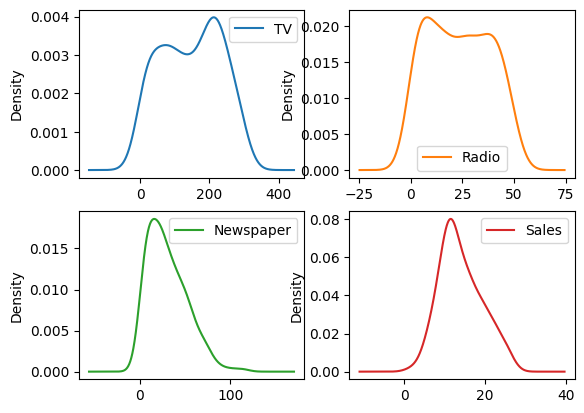

In [17]:
df.plot(kind ='density',subplots = True, layout =(2,2),sharex = False);

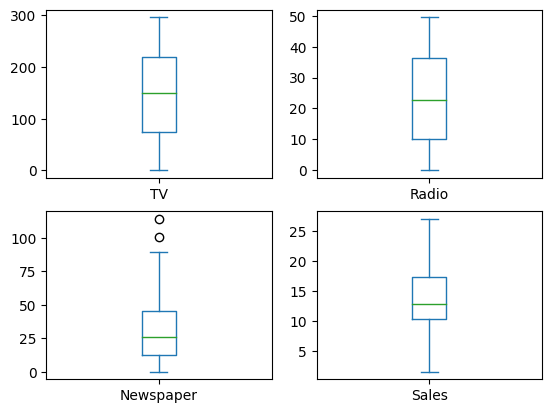

In [18]:
df.plot(kind ='box',subplots = True, layout =(2,2),sharex = False);

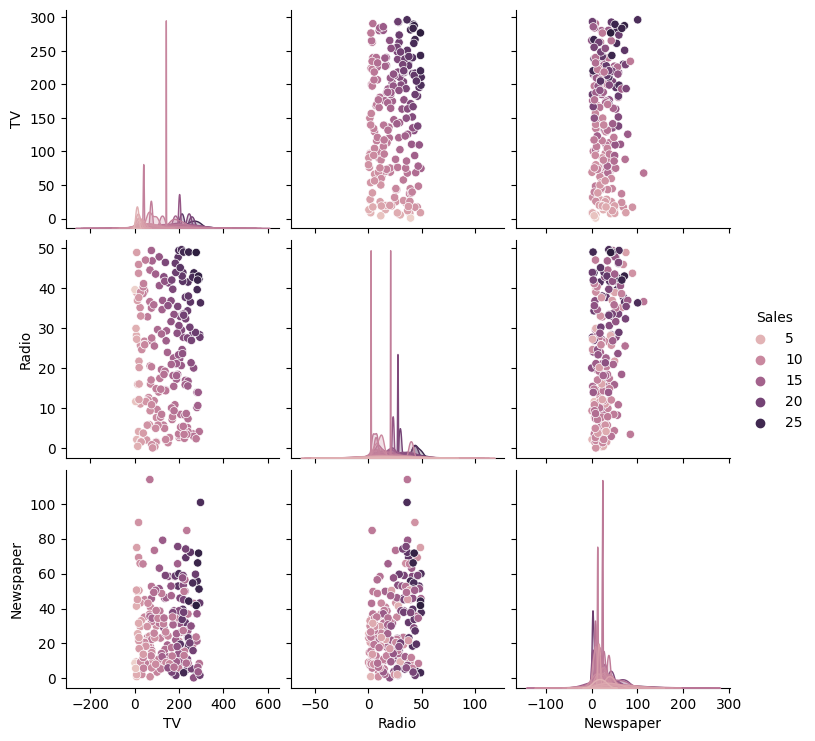

In [19]:
sns.pairplot(df,hue='Sales');

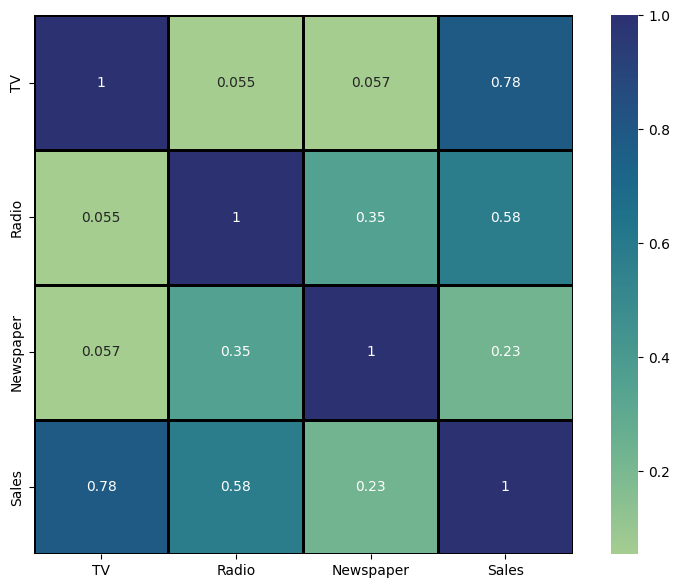

In [20]:
#Heat Maps
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False,cbar=True,cmap="crest")

In [21]:
#Correlation 
corr_mat = df.corr()
print(corr_mat)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


# Preparing data for modelling

In [22]:
X=df.drop("Sales",axis=1)
y=df.Sales.values

In [23]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [24]:
y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

In [25]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [26]:
X_train.head()

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6


In [27]:
y_train,len(y_train)

(array([11. , 12.8, 10.1,  9.7, 11.6,  7.6, 10.5, 14.6, 10.4, 12. , 14.6,
        11.7,  7.2,  6.6,  9.4, 11. , 10.9, 25.4,  7.6, 11.7, 15. , 15.5,
        11.9,  9.2, 12.8,  6.6, 20.7,  6.7, 11.2,  9.5, 10.7,  8.8, 14.9,
        17.1, 15.9, 15.9, 15. , 20.7, 11.7, 21.8,  9.3, 14.2, 10.6, 17.3,
         9.9, 15.2, 13.3, 25.4, 10.8, 24.2,  5.6, 19.2, 23.8, 17.4, 17.4,
        17.3, 12.9, 11.8, 15.9, 15.5, 12.9,  9.6, 20.1, 10.3, 19.8, 11.4,
         8.6, 15.7, 14.1, 13.2,  8. , 22.1, 25.5, 19. , 18.3, 15.2, 18. ,
         8.5, 18. , 18.9, 16.6,  5.3,  3.2, 15.3, 12. , 15.5, 17.6, 25.4,
        12.3, 21.5, 17.1, 23.2, 11.5, 15.6, 12.9,  9.6, 18.5, 19.2, 21.2,
        19.6, 10.5, 11.8, 22.6,  9.7, 11.8,  9.5, 13.2, 13.4,  7.3, 13.6,
        20.2, 12.2, 16.7,  4.8,  9.7, 18.4, 14.5, 12.7, 24.4,  8.8, 27. ,
        10.8, 12.2, 26.2, 14. , 20.2,  8.7, 11.4,  9.7, 23.8, 14.8, 12.9,
        12.5, 13.2, 14.4,  5.9,  9.7, 14.7, 10.1, 19.6, 10.4, 22.6, 10.1,
         1.6, 11.6, 14.7, 17.2, 12.2, 

In [28]:
X_test.head()

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2


In [29]:
y_test,len(y_test)

(array([16.9, 22.4, 21.4,  7.3, 24.7, 12.6, 22.3,  8.4, 11.5, 14.9,  9.5,
         8.7, 11.9,  5.3, 10.3, 11.7,  5.5, 16.6, 11.3, 18.9, 19.7, 12.5,
        10.9, 22.2,  9.3,  8.1, 21.7, 13.4, 10.6,  5.7, 10.6, 11.3, 23.7,
         8.7, 16.1, 20.7, 11.6, 20.8, 11.9,  6.9]),
 40)

# Let's make a model

In [30]:
classifier = LinearRegression()

In [31]:
classifier.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred=classifier.predict(X_test)

In [33]:
score=classifier.score(X_train,y_train)

In [34]:
print(f"The accuracy of Linear Regression model is {score*100:.2f}%")

The accuracy of Linear Regression model is 89.57%


In [35]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 3.17
Root Mean Squared Error: 1.78
Mean Absolute Error: 1.46
R-squared Score: 0.90


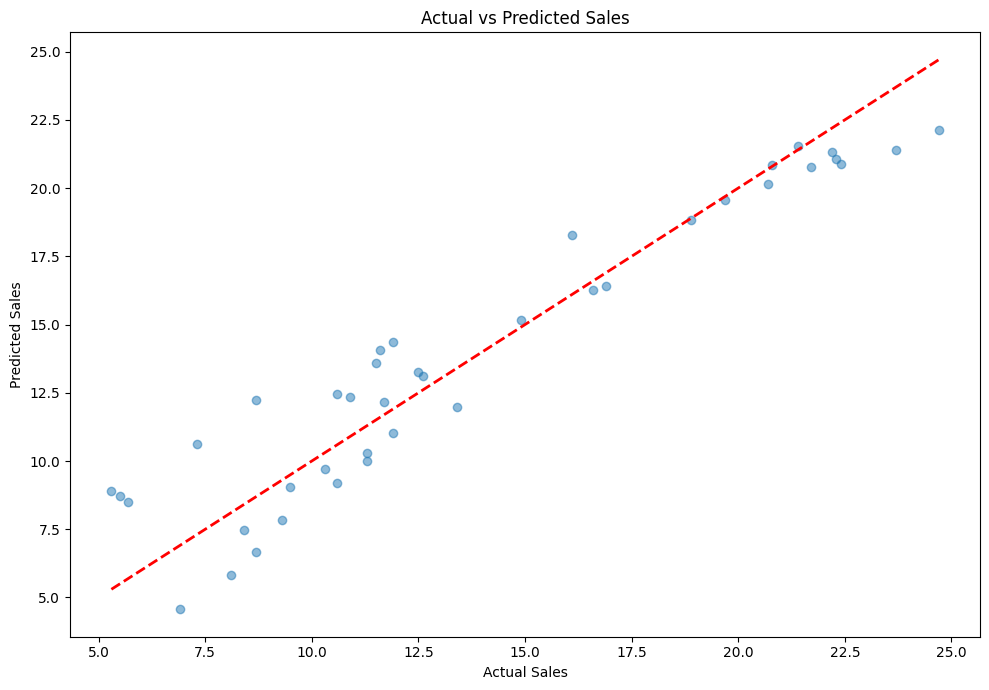

In [36]:
# Scatter plot of predicted vs actual values
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.tight_layout()
plt.show()

In [37]:
model=RandomForestRegressor()

In [38]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [39]:
y_preds=model.predict(X_test)

In [40]:
mark=model.score(X_train,y_train)

In [41]:
print(f"The accuracy of Random Forest Regressor model is {mark*100:.2f}%")

The accuracy of Random Forest Regressor model is 99.67%


In [42]:
# Calculate metrics
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_preds)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 0.62
Root Mean Squared Error: 0.79
Mean Absolute Error: 0.66
R-squared Score: 0.90


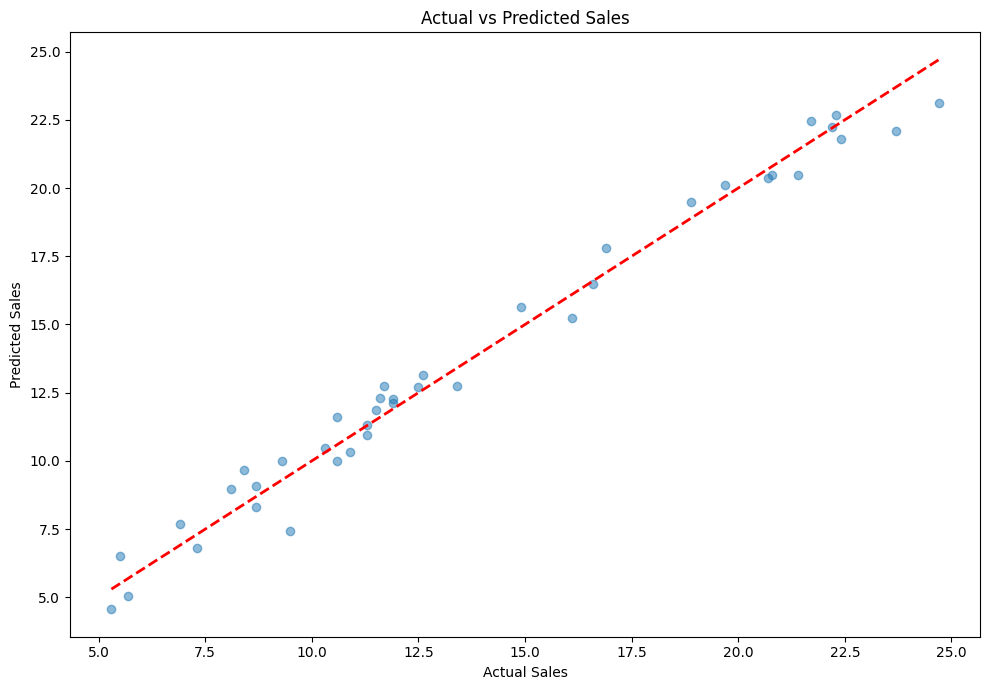

In [43]:
# Scatter plot of predicted vs actual values
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.tight_layout()
plt.show()

In [44]:
n=GradientBoostingRegressor()

In [45]:
n.fit(X_train,y_train)

GradientBoostingRegressor()

In [46]:
y_pre=n.predict(X_test)

In [47]:
mod=n.score(X_train,y_train)

In [48]:
print(f"The accuracy of Gradient Boost Regressor model is {mod*100:.2f}%")

The accuracy of Gradient Boost Regressor model is 99.87%


In [49]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pre)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pre)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 0.53
Root Mean Squared Error: 0.73
Mean Absolute Error: 0.61
R-squared Score: 0.90


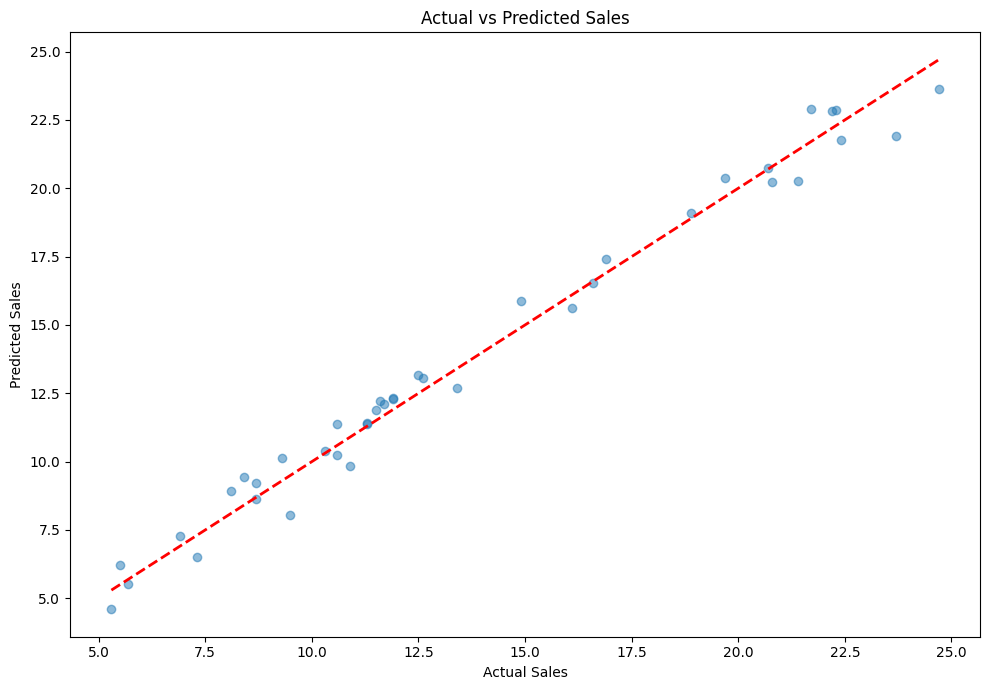

In [50]:
# Scatter plot of predicted vs actual values
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pre, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.tight_layout()
plt.show()